# Matplotlib Exercise 1

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Line plot of sunspot data

Download the `.txt` data for the "Yearly mean total sunspot number [1700 - now]" from the [SILSO](http://www.sidc.be/silso/datafiles) website. Upload the file to the same directory as this notebook.

In [2]:
import os
assert os.path.isfile('yearssn.dat')

Use `np.loadtxt` to read the data into a NumPy array called `data`. Then create two new 1d NumPy arrays named `years` and `ssc` that have the sequence of year and sunspot counts.

In [3]:
# YOUR CODE HERE

def split_data(arr):
    dataA = []
    dataB = []
    for i in arr:
        dataA.append(i[0])
        dataB.append(i[1])
    return np.array(dataA), np.array(dataB)

data = np.loadtxt('yearssn.dat')
year, ssc = split_data(data)

In [4]:
assert len(year)==315
assert year.dtype==np.dtype(float)
assert len(ssc)==315
assert ssc.dtype==np.dtype(float)

Make a line plot showing the sunspot count as a function of year.

* Customize your plot to follow Tufte's principles of visualizations.
* Adjust the aspect ratio/size so that the steepest slope in your plot is *approximately* 1.
* Customize the box, grid, spines and ticks to match the requirements of this data.

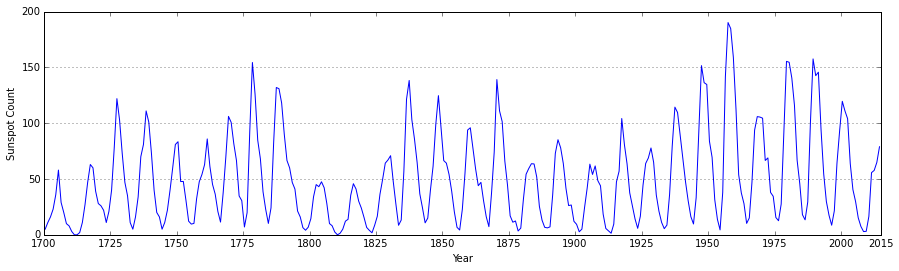

In [5]:
# YOUR CODE HERE
plt.plot(year, ssc)
plt.xlabel('Year')
plt.ylabel('Sunspot Count')
plt.xlim([1700, 2015])
ticks = list(range(1700,2025,25))
ticks.append(2015)
plt.xticks(ticks)
plt.gcf().set_size_inches(15, 4)
plt.gca().yaxis.grid(True) # http://stackoverflow.com/q/16074392/1131435

In [6]:
assert True # leave for grading

Describe the choices you have made in building this visualization and how they make it effective.

The graph was made wider to accommodate the granularity of the data. Consequently, for clarity, horizontal grid lines were added to allow tracing back to the tick marks on the side. As the chart was made wider, the horizontal ticks were increased to allow for ease of reading under higher detail. 50 was selected for the vertical ticks as it approximates the three apparent heights.

Now make 4 subplots, one for each century in the data set. This approach works well for this dataset as it allows you to maintain mild slopes while limiting the overall width of the visualization. Perform similar customizations as above:

* Customize your plot to follow Tufte's principles of visualizations.
* Adjust the aspect ratio/size so that the steepest slope in your plot is *approximately* 1.
* Customize the box, grid, spines and ticks to match the requirements of this data.

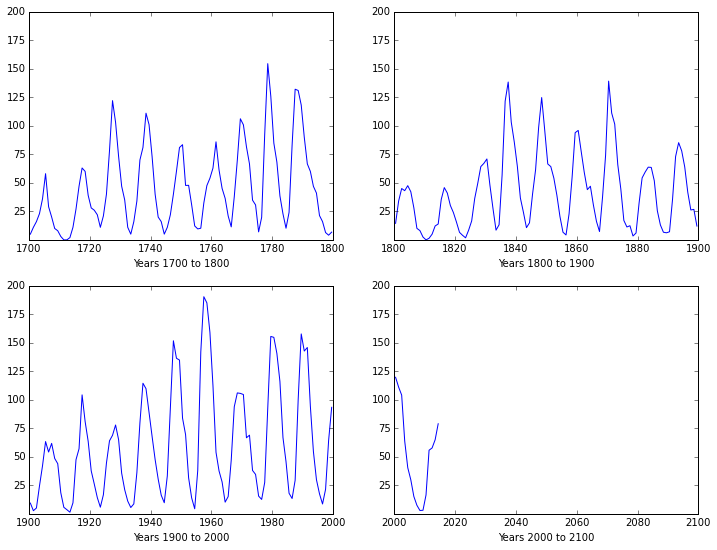

In [7]:
# YOUR CODE HERE
fig, ax = plt.subplots(2,2)

for i in [0,1]:
    for j in [0,1]:
        plt.sca(ax[i,j])
        cntry_min = (i*2+j)*100+1700
        cntry_max = (i*2+j)*100+1800
        # List comprehension to strip centuries off into their own lists
        subyr = [x for x in data if (i*2+j)*100+1700 < x[0] and (i*2+j)*100+1800 > x[0]]
        x, y = split_data(subyr)
        plt.plot(x, y)
        plt.xticks(range(cntry_min, cntry_max+1, 20))
        plt.yticks(range(25, 201, 25))
        plt.xlabel("Years " + str(cntry_min) + " to " + str(cntry_max))

plt.gcf().set_size_inches(12,9)

In [8]:
assert True # leave for grading